In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline

[]

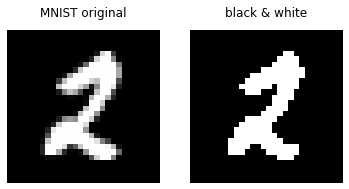

In [2]:
mnist = fetch_mldata('MNIST original', data_home='.')

idx = 15102

pic = mnist.data[idx].reshape(28,28)
tar = int( mnist.target[idx] )

bw = np.zeros( pic.shape )
bw[ np.where( pic/256. >= 0.5 ) ] = 1

fig,ax = plt.subplots(1,2)
ax[0].matshow(pic, cmap='gray')
ax[1].matshow(bw, cmap='gray')

ax[0].set_title('MNIST original')
ax[1].set_title('black & white')

ax[0].get_xaxis().set_ticks([])
ax[1].get_xaxis().set_ticks([])
ax[0].get_yaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])

#fig.savefig('MNIST_data.png',dpi=200)

In [3]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))
# end def
def get_vis(h,W,a):
    return map(int, np.random.rand(len(a)) < sigmoid(np.dot(W.T,h)+a) )
# end def
def get_hid(v,W,b):
    return map(int, np.random.rand(len(b)) < sigmoid(np.dot(W,v)+b) )
# end def

In [4]:
# binary restricted Bolzmann machine
# Hinton contrastic divergence training

# initialize model
nvis = 28*28
nhid = 20
istart = 0
ntrain = 60000

avg = mnist.data.mean(axis=0)
v_data = np.zeros(nvis)

load_previous = False
if load_previous:
    #W = oldW.copy()
    #b = oldb.copy()
    #c = oldc.copy()
    pass
else:
    # reinitialize
    W = 0.01*np.random.randn(nhid,nvis)
    a = avg # shift of visible units
    b = -0.1*np.ones(nhid) # shift of hidden units
# end if

In [52]:
a = np.zeros(nvis)
b = np.zeros(nhid)

trace = np.zeros(ntrain)
# train model
eps = 0.5 # learning rate
for isample in range(istart,istart+ntrain):
    entry = mnist.data[isample]
    # make entry a binary vector
    v_data= np.zeros(nvis)
    v_data[ np.where( entry/256.>=0.5 ) ] = 1
    
    # sample hidden units
    #h_data = get_hid(v_data,W,b)
    h_data = sigmoid(np.dot(W,v_data))
    # calculate <v \outer h>_data
    W_data = np.outer(h_data,v_data)
    
    # calculate <v \outer h>_model
    v_model = get_vis(h_data,W,a)
    h_model = get_hid(v_model,W,b)
    W_model = np.outer(h_model,v_model)
    
    
    # update parameters
    W += eps*(W_data-W_model)
    a += eps*(v_data-v_model)
    b += eps*(h_data-h_model)
    
    # record performance
    rec_overlap = np.dot(v_data,v_model)/np.dot(v_data,v_data)/np.dot(v_model,v_model)
    trace[isample-istart] = rec_overlap
# end for isample

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [51]:
# save current machine
oldW = W.copy()
olda = a.copy()
oldb = b.copy()

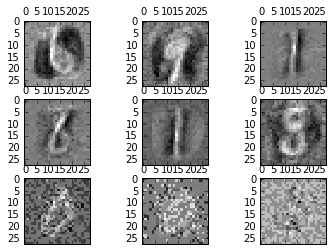

In [4]:
#"""
# load trained machine
W = np.loadtxt('W20784.dat')
a = np.loadtxt('a784.dat')
b = np.loadtxt('b20.dat')
#""";

# visualize weight vectors
fig,ax = plt.subplots(3,3)

# sort by hidden unit shift
idx = np.argsort(b)[::-1]

for ix in range(3):
    for iy in range(3):
        inum = idx[ ix*3+iy ]
        myax = ax[ix][iy]
        myax.matshow( W[inum].reshape(28,28), cmap='gray')
    # end for iy
# end for ix

#fig.savefig('brmb_Wmat.png',dpi=200)

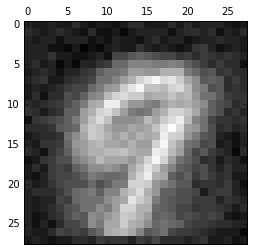

In [5]:
plt.matshow(a.reshape(28,28),cmap='gray')
#plt.savefig('vis_shift.png',dpi=200)

In [8]:
def sample(a,b,W,nstep=10):
    h = np.random.randint(2,size=len(b))
    for istep in range(nstep):
        v = get_vis(h,W,a)
        h = get_hid(v,W,b)
    # end for
    return v
# end def

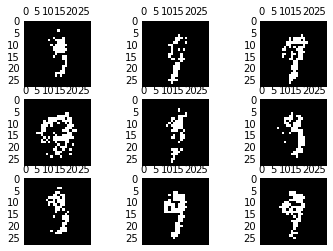

In [75]:
seed = 8
np.random.seed(seed)

nstep = 1500
# visualize weight vectors
fig,ax = plt.subplots(3,3)

for ix in range(3):
    for iy in range(3):
        inum = ix*3+iy+2
        myax = ax[ix][iy]
        test = np.array( sample(a,b,W,nstep) )
        
        myax.matshow( test.reshape(28,28), cmap='gray')
    # end for iy
# end for ix

#plt.savefig('results_step%d_seed%d.png'%(nstep,seed),dpi=200)

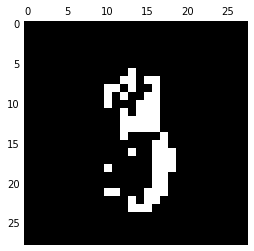

In [26]:
test = np.array( sample(a,b,W,1000) )
plt.matshow(test.reshape(28,28),cmap='gray')

In [65]:
# save machine state
np.savetxt('W%d%d.dat'%(nhid,nvis),W)
np.savetxt('a%d.dat'%nvis,a)
np.savetxt('b%d.dat'%nhid,b)